In [220]:
import cv2 as cv
import skimage
from skimage.filters import frangi
import skimage.morphology as mp
from glob import glob
from matplotlib import pyplot as plt
import numpy as np

In [281]:
def preprocess(img):
    img = cv.cvtColor(img, cv.COLOR_RGB2BGR)
    img_green = img[:, :, 1]
    img = np.zeros(img.shape)
    img[:, :, 1] = img_green
    img = cv.cvtColor(img.astype(np.uint8), cv.COLOR_BGR2GRAY)
    img = cv.GaussianBlur(img, (3,3), 0)
    plt.figure()    
    plt.imshow(img, 'gray')
    return img

In [286]:
def main_processing(img, mask):
    img = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 31, 2)
    img = 255 - img
    plt.figure()    
    plt.imshow(img, 'gray')
    img = img*mask[:, :, 0]
    plt.figure()    
    plt.imshow(img, 'gray')
    
    # img_frangi = frangi(img)
    # plt.figure()    
    # plt.imshow(img_frangi, 'gray')
    
    mask = np.zeros_like(img)
    contours = cv.findContours(img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]

    area_thresh = 60
    for cntr in contours:
        area = cv.contourArea(cntr)
        if area > area_thresh:
            cv.drawContours(mask, [cntr], -1, 255, 2)
    
    img = cv.bitwise_and(img, mask)
    kernel = np.ones((5,5), np.uint8)
    img = cv.dilate(img, kernel, iterations=1)
    
    plt.figure()    
    plt.imshow(img, 'gray')
    return img

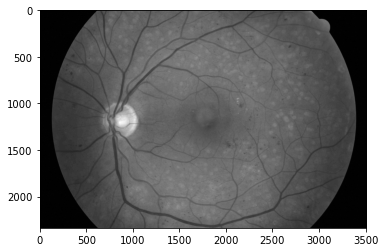

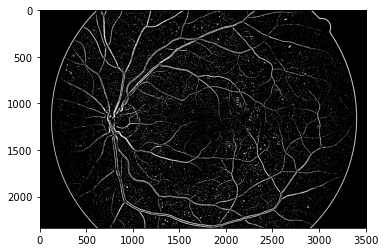

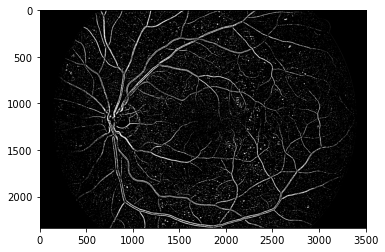

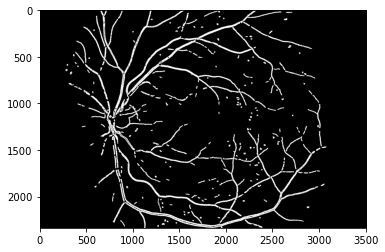

In [287]:
files = glob('images/*')
fovs = glob('mask/*')
#print(files)
for file, fov in zip(files, fovs):
    img = cv.imread(file)
    mask = cv.imread(fov)
    #img = cv.resize(img, (1500,1500))
    img = preprocess(img)
    img = main_processing(img, mask)
    break